In [44]:
import pandas as pd
import math
import csv
import numpy as np
import matplotlib.pyplot as plt

In [45]:
prop = pd.read_csv('data/raw/property_data.csv')
print(prop.columns.to_list())
# print(prop)

['ID', 'Postal code', 'Locality', 'Type', 'Subtype', 'Price ', 'Bedrooms', 'Living area', 'Kitchen Type', 'Furnished', 'How many fireplaces?', 'Terrace surface', 'Garden surface', 'Surface of the plot', 'Number of frontages', 'Swimming pool', 'Building condition', 'Surroundings type', 'Energy class', 'Construction year', 'Heating type', 'Primary energy consumption', 'Venue of the sale', 'Tenement building', 'New build']


In [46]:
cum = prop[['Postal code', 'Price ']].groupby('Postal code').sum().sort_values(by='Price ', ascending=False).head(10)
cum_index = cum.index.to_list()

av = prop[['Postal code', 'Price ']].groupby('Postal code').mean().loc[cum_index].head(10)#.sort_values(by='Price ', ascending=False)

cum = cum['Price '].to_list()
av = av['Price '].to_list()
cum_index = [str(x) for x in cum_index]

print(cum)
print(av)
print(cum_index)

# x = np.arange(len(cum_index))
# width = 4

# plt.bar(x-width, cum, color = 'g')
# plt.bar(x+width, av, color = 'b')
plt.xticks(x,cum_index)
plt.show()

[1697751000, 567253509, 511591518, 433714500, 423865695, 249522237, 190670805, 180259699, 169280400, 165600099]
[1535037.0705244122, 932982.7450657894, 790713.3199381762, 656149.0166414523, 501023.28014184395, 630106.6590909091, 794461.6875, 438588.07542579074, 544309.9678456591, 335902.8377281947]
['8300', '1180', '1050', '1000', '9000', '2000', '1150', '9800', '1200', '8400']


NameError: name 'x' is not defined

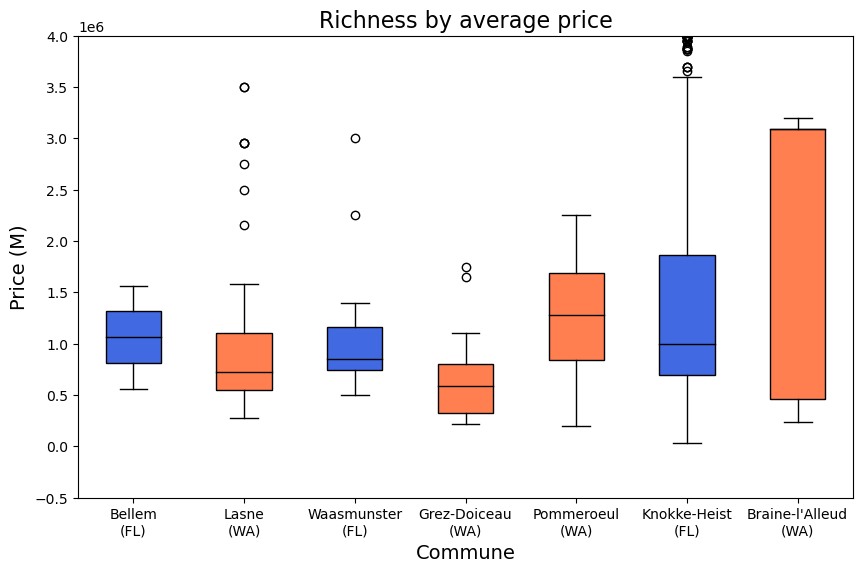

In [83]:

av_index = {9881 : 'Bellem\n(FL)',
            1380 : 'Lasne\n(WA)',
            9250 : 'Waasmunster\n(FL)',
            1390 : 'Grez-Doiceau\n(WA)',
            7322 : 'Pommeroeul\n(WA)',
            8300 : 'Knokke-Heist\n(FL)',
            1421 : 'Braine-l\'Alleud\n(WA)'}

av = prop[['Postal code', 'Price ']].groupby('Postal code').mean().sort_values(by='Price ', ascending = True).tail(nb_codes)

prices_by_postal_code = [prop.loc[prop['Postal code'] == code]['Price '] for code in av_index.keys()]

# Create a boxplot for each postal code using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = ax.boxplot(prices_by_postal_code, labels=av_index.values(), patch_artist=True, medianprops={'color':'black'})
plt.title('Richness by average price', fontsize=16)
plt.xlabel('Commune', fontsize=14)
plt.ylabel('Price (M)', fontsize=14)
plt.ylim(-0.05e7, 4e6)

# Customize boxplot colors
#  colors = plt.cm.Paired(range(len(boxplot['boxes'])))
# for patch, color in zip(boxplot['boxes'], colors):
#     patch.set_facecolor(color)
    

    
# colors=[]
# for label in sum_index.values():
#     if 'FL' in label: colors.append('royalblue')
#     elif 'WA' in label: colors.append('tomato')
#     else: print('aa')
    
# for patch, color in zip(boxplot['boxes'], colors):
#     patch.set_facecolor(color)

    # elif 'WA' in label: colors.append('tomato')
# colors = ['forestgreen' if 'BXL' in label elif 'royalblue' for label in sum_index.values()]

# colors=[]
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
colors = ['coral' if 'WA' in label else 'royalblue' for label in av_index.values()]

# Add the number of observations inside each boxplot
for i, box in enumerate(boxplot['boxes']):
    # Get the number of observations for the current postal code
    num_observations = len(prices_by_postal_code[i])

    # Add text annotation inside the boxplot, slightly above the median
    # ax.text(i + 1, box.get_ydata()[1] + 0.02e7, f'N={num_observations}',
    #          ha='center', va='center', color='blue', fontsize=10)

plt.show()


AttributeError: 'PathPatch' object has no attribute 'get_ydata'

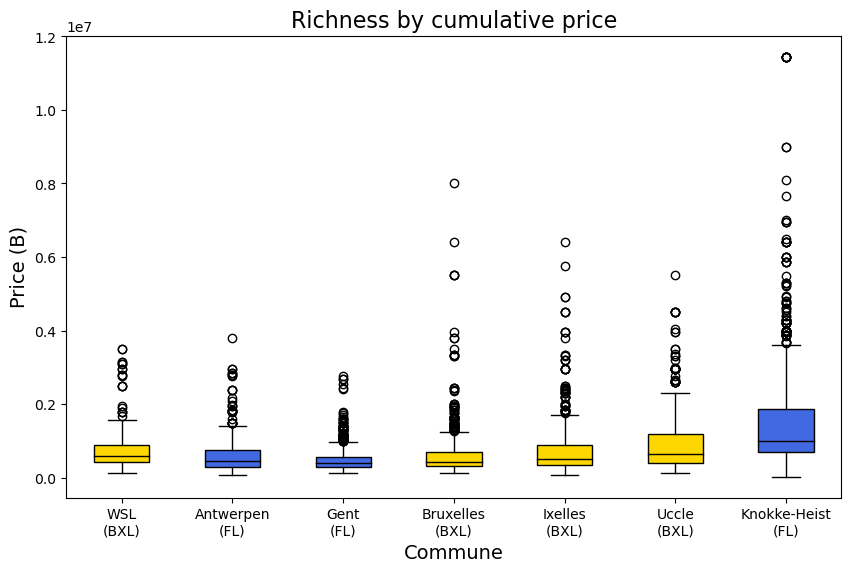

In [89]:
sum_prices = prop[['Postal code', 'Price ']].groupby('Postal code').sum().sort_values(by='Price ', ascending=True).tail(nb_codes)
sum_index = {1150 : 'WSL\n(BXL)',
             2000 : 'Antwerpen\n(FL)',
             9000 : 'Gent\n(FL)',
             1000 : 'Bruxelles\n(BXL)',
             1050 : 'Ixelles\n(BXL)',
             1180 : 'Uccle\n(BXL)',
             8300 : 'Knokke-Heist\n(FL)'}

# Create a list to store prices for each postal code
prices_by_postal_code = [prop.loc[prop['Postal code'] == code]['Price '] for code in sum_index.keys()]

# Create a boxplot for each postal code using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = ax.boxplot(prices_by_postal_code, labels=sum_index.values(), patch_artist=True, medianprops={'color':'black'})
plt.title('Richness by cumulative price', fontsize=16)
plt.xlabel('Commune', fontsize=14)
plt.ylabel('Price (B)', fontsize=14)

# Customize boxplot colors
# colors = plt.cm.Paired(range(len(boxplot['boxes'])))
# for patch, color in zip(boxplot['boxes'], colors):
#     patch.set_facecolor(color)
# colors=[]
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
colors = ['gold' if 'BXL' in label else 'royalblue' for label in sum_index.values()]

# Add the number of observations inside each boxplot
for i, box in enumerate(boxplot['boxes']):
    # Get the number of observations for the current postal code
    num_observations = len(prices_by_postal_code[i])

    # Add text annotation inside the boxplot, slightly above the median
    ax.text(i + 1, box.get_ydata()[1] + 0.02e7, f'N={num_observations}',
             ha='center', va='center', color='blue', fontsize=10)

plt.show()

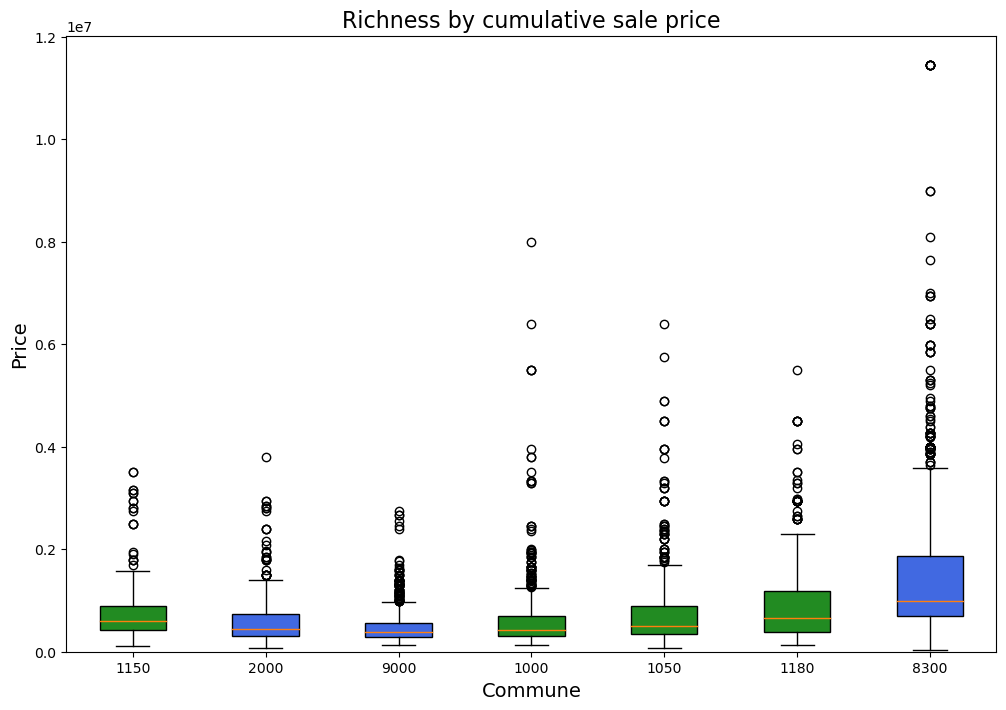

In [33]:
nb_codes = 7

sum_prices = prop[['Postal code', 'Price ']].groupby('Postal code').sum().sort_values(by='Price ', ascending=True).tail(nb_codes)
sum_index = {1150 : 'WSL\n(BXL)',
             2000 : 'Antwerpen\n(FL)',
             9000 : 'Gent\n(FL)',
             1000 : 'Bruxelles\n(BXL)',
             1050 : 'Ixelles\n(BXL)',
             1180 : 'Uccle\n(BXL)',
             8300 : 'Knokke-Heist\n(FL)'}
# label = list(sum_index.values())
# print(type(label))

prices_by_postal_code = [prop.loc[prop['Postal code'] == code]['Price '] for code in sum_index.keys()]

# Create a boxplot for each postal code using Matplotlib
fig, ax = plt.subplots(figsize=(12, 8))
boxplot = ax.boxplot(prices_by_postal_code, labels=sum_index, patch_artist=True)

# Set different colors for boxes with "BXL" or "FL"
colors = ['forestgreen' if 'BXL' in label else 'royalblue' for label in sum_index.values()]
# print(colors)
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Represent outliers with a scatter plot
for i, flier in enumerate(boxplot['fliers']):
    flier_x = flier.get_xdata()
    flier_y = flier.get_ydata()
    plt.scatter(flier_x, flier_y, marker='o', color='white', s=50, alpha=0.2)

plt.title('Richness by cumulative sale price', fontsize=16)
plt.xlabel('Commune', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Set y-axis limits
plt.ylim(bottom=0)

# Create a legend for the colors
# legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in ['green', 'blue']]
# plt.legend(legend_labels, ['BXL', 'FL'], title='Region', title_fontsize='12', loc='upper right')

plt.show()